In [1]:
from osgeo import gdal
import pyproj as proj

In [2]:
p1 = proj.Proj(proj='longlat',datum='WGS84') # doms box projection

In [3]:
p2 = proj.Proj(proj='lcc',lat_1=28,lat_2=50,lat_0=39.70001220694445,lon_0=-98,x_0=0,y_0=0,a=6370000,
               b=6370000,units='m') # WRF hydro LCC projection

In [4]:
p3 = proj.Proj(proj='lcc',lat_1=35.0,lat_2=45.0,lat_0=37.5,lon_0=-96,x_0=0,y_0=0,ellps='WGS84',
               datum='WGS84',units='m')

In [5]:
p2.srs

'+a=6370000 +b=6370000 +y_0=0 +lon_0=-98 +proj=lcc +x_0=0 +units=m +lat_2=50 +lat_1=28 +lat_0=39.7000122069 '

In [6]:
p2.srs

'+a=6370000 +b=6370000 +y_0=0 +lon_0=-98 +proj=lcc +x_0=0 +units=m +lat_2=50 +lat_1=28 +lat_0=39.7000122069 '

In [7]:
# dom's box coordinates in WGS84
bx_longs= np.array([-112.25,-112.25,-104.125,-104.125,-112.25])
bx_lats = np.array([33.0,43.75,43.75,33.0,33.0])

In [8]:
bx_x,bx_y = proj.transform(p1,p2,bx_longs,bx_lats) # Convert WGS84 to WRF LCC projection

In [9]:
fl = '/Users/barnhatb/Downloads/To_Dominik_2016_02_12/geo_em_hgt_m/dblbnd.adf'

In [10]:
d = gdal.Open(fl)

In [11]:
dem = np.array(d.GetRasterBand(1).ReadAsArray())

In [12]:
width = d.RasterXSize # get width
height = d.RasterYSize # get height

In [13]:
# get cell extents
gt = d.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3] 

In [14]:
cw = gt[1] # get cell width

In [15]:
print minx
print maxx
print miny
print maxy

-2717999.69573
2718000.30427
-2030002.06259
2029997.93741


In [16]:
width

1359

In [17]:
height

1015

In [18]:
# compute cell centers at extents
cc_minx = minx + cw/2.
cc_maxx = maxx - cw/2.
cc_miny = miny + cw/2.
cc_maxy = maxy - cw/2.

In [19]:
# generate lists of cell centers
ccX = np.reshape(np.arange(cc_minx,cc_maxx+cw,cw),(1,width))
ccY = np.reshape(np.arange(cc_miny,cc_maxy+cw,cw),(height,1))

In [20]:
X = np.repeat(ccX,height,axis=0)
Y = np.repeat(ccY,width,axis=1)

In [21]:
Y.shape

(1015, 1359)

In [22]:
box_x = [bx_x.max(),bx_x.max(),bx_x.min(),bx_x.min(),bx_x.max()]
box_y = [bx_y.min(),bx_y.max(),bx_y.max(),bx_y.min(),bx_y.min()]

In [23]:
print box_x
print box_y

[-483968.1920225884, -483968.1920225884, -1306471.272484048, -1306471.272484048, -483968.1920225884]
[-713442.25968620542, 531025.5694900793, 531025.5694900793, -713442.25968620542, -713442.25968620542]


NameError: name 'cropXcoords' is not defined

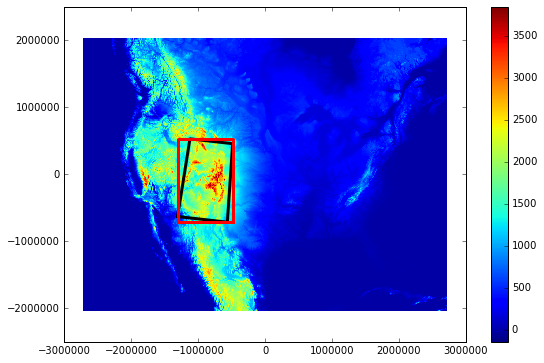

In [24]:
plt.figure(figsize=(9,6))
plt.pcolormesh(X,Y,np.flipud(dem))
plt.colorbar()
plt.plot(bx_x,bx_y,'k',lw=3)
plt.plot(box_x,box_y,'r',lw=3)
plt.axis('equal')
#plt.xlim(np.min(box_x)-40000,np.max(box_x)+40000)
#plt.ylim(np.min(box_y)-40000,np.max(box_y)+40000)
plt.scatter(cropXcoords,cropYcoords,s=10,c=index,edgecolors='none')

In [25]:
print np.max(box_x)
print np.min(box_x)
print np.max(box_y)
print np.min(box_y)

-483968.192023
-1306471.27248
531025.56949
-713442.259686


In [26]:
maxXind = np.where(ccX<=bx_x[1])[1].max() # max x index
minXind = np.where(ccX>=bx_x[0])[1].min() # min x index

maxYind = np.where(ccY<=bx_y[1])[0].max() # max y index
minYind = np.where(ccY>=bx_y[0])[0].min() # min y index

In [27]:
# wrf crop boundaries
cropxmin = 333
cropxmax = 578+1
cropymin = 309
cropymax = 659+1

In [28]:
#extract the wrf coordinates
crop_Xmin = ccX[0][cropxmin]
crop_Xmax = ccX[0][cropxmax]
crop_Ymin = ccY[cropymin][0]
crop_Ymax = ccY[cropymax][0]

In [29]:
crop_line_X = np.arange(crop_Xmin,crop_Xmax,cw) # make a list of x cell centers
crop_line_Y = np.arange(crop_Ymin,crop_Ymax,cw) # make a list of y cell centers

crop_line_X = np.reshape(crop_line_X,(1,len(crop_line_X)))
crop_line_Y = np.reshape(crop_line_Y,(len(crop_line_Y),1))

In [30]:
# make 2D arrays of X and Y coordinates for the cropped region
crop_grid_X = np.repeat(crop_line_X,cropymax-cropymin,axis=0)
crop_grid_Y = np.repeat(crop_line_Y,cropxmax-cropxmin,axis=1)

In [31]:
# make 1D arrays of the X and Y coordiantes
cropXcoords = np.reshape(crop_grid_X,np.shape(crop_grid_X)[0]*np.shape(crop_grid_X)[1])
cropYcoords = np.reshape(crop_grid_Y,np.shape(crop_grid_Y)[0]*np.shape(crop_grid_Y)[1])
index = np.linspace(1,len(cropXcoords),num=len(cropXcoords))

In [32]:
#cropXcoords,cropYcoords = proj.transform(p2,p3,cropXcoords,cropYcoords)

In [33]:
out = pd.DataFrame({'longs':cropXcoords,'lats':cropYcoords,'index':index})

In [34]:
index.shape = crop_grid_X.shape # reshape the index array into 2D

In [35]:
np.save('./data/index.npy',index)

In [36]:
out.to_csv('./data/index_coords.csv',index=False,header=True)

In [37]:
p2.srs

'+a=6370000 +b=6370000 +y_0=0 +lon_0=-98 +proj=lcc +x_0=0 +units=m +lat_2=50 +lat_1=28 +lat_0=39.7000122069 '